<blockquote style="font-family: Arial, sans-serif; font-size: 16px; margin: 20px; padding: 15px; background-color: #f9f9f9; border-left: 10px solid #ccc;">
    <p style="color: #2a2a2a;">
        <em>
            <strong style="color: #0056b3;">LLMs is the hottest topic of the town.</strong> 
            But recently, the focus has shifted from LLMs to how to use these LLMs for real world problems, for which <strong style="color: #0056b3;">Langchain</strong> provides a framework to implement different use cases.
        </em>
    </p>
</blockquote>


<blockquote style="font-family: Arial, sans-serif; font-size: 16px; margin: 20px; padding: 15px; background-color: #f9f9f9; border-left: 10px solid #ccc; color:black; ">
<strong style="color: #0056b3;">Langchain</strong>

- LangChain is a framework for developing applications powered by language models. It enables applications that:

    - Are context-aware: connect a language model to sources of context (prompt instructions, few shot examples, content to ground its response in, etc.)
    - Reason: rely on a language model to reason (about how to answer based on provided context, what actions to take, etc.)

</blockquote>

<blockquote style="font-family: Arial, sans-serif; font-size: 16px; margin: 20px; padding: 15px; background-color: #f9f9f9; border-left: 10px solid #ccc; color:black; ">
<strong style="color: #0056b3;">Components</strong>

- Models (LLM and ChatModel)

- Prompt Templates (Different templates for prompting)

- Output Parsers (How to structure your output)

- Chains (Chaining LLMs or other tools for complex problems)

- Memory (to remember previous conversations)

- Retrievers (Accessing external documents/context using LLMs)

- Agents (To execute sequence of actions, more flexible and diverse than Chains)

- Callbacks (logging events)


! pip install langchain langchain-experimental openai

Have OPEN_API_KEY in your env variables. 

https://platform.openai.com/api-keys

<blockquote style="font-family: Arial, sans-serif; font-size: 16px; margin: 20px; padding: 15px; background-color: #f9f9f9; border-left: 10px solid #ccc; color:black; ">
<strong style="color: #0056b3;">Models</strong>


- LLMs: Such models are similar to what you general LLM models which can be used for any purpose
- ChatModels: Using LLMs under the hood, these models are specific to chatbots

In [2]:
from langchain.llms import OpenAI
llm = OpenAI()

llm("Explain how AI wil change the world")

'\n\nAI has the potential to revolutionize the way we live and work. In the future, AI solutions will be used to solve a variety of problems, from providing personalized healthcare to automating tedious tasks. AI-powered robots will be able to do the work of many human laborers, freeing up humans to focus on more creative and stimulating pursuits. AI can also be used to make more efficient use of resources, reducing waste and helping to reduce our environmental footprint. AI will also help with decision-making and enable us to predict and prevent potential disasters, such as natural disasters or pandemics. Finally, AI can be used to improve the human experience by providing tailored entertainment, education, and communication services. In short, AI will profoundly transform our lives and the world we live in.'

<blockquote style="font-family: Arial, sans-serif; font-size: 16px; margin: 20px; padding: 15px; background-color: #f9f9f9; border-left: 10px solid #ccc; color:black; ">
<strong style="color: #0056b3;">Template Types</strong>

- HumanMessage : The prompt given by the user

- AIMessage : The response given by the LLM

- SystemMessage: Its a context that we can pass to the chatmodel about its role.- 

In [5]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage,SystemMessage

messages = [SystemMessage(
content="You are a Grammar Teacher who responds Yes for correct Grammar input"),
HumanMessage(content="I love , programming.")]

chat = ChatOpenAI()
chat(messages)

AIMessage(content='Yes, that is correct grammar.')

<blockquote style="font-family: Arial, sans-serif; font-size: 16px; margin: 20px; padding: 15px; background-color: #f9f9f9; border-left: 10px solid #ccc; color:black; ">
<strong style="color: #0056b3;">Prompt Templates</strong>

*This is used to create a prompt from string input. This can be considered as the baseline version of templates where you can pass a variable or simply write a whole prompt as required*

In [6]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    "Write 5 lines about India"
)
prompt_template.format()

'Write 5 lines about India'

In [ ]:
from langchain.prompts.chat import ChatPromptTemplate
from langchain.prompts import ChatPromptTemplate
from langchain.prompts.chat import  HumanMessagePromptTemplate
from langchain.chat_models import ChatOpenAI
# template = "You are a helpful assistant that translates {input_language} to {output_language}."
human_template = "{text}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a python coder AI that helps user with bugs and writing programs"),
    ("human", "{text}"),
])

llm = ChatOpenAI()
llm(chat_prompt.format_messages(text='Check whether a number is prime or not'))

<blockquote style="font-family: Arial, sans-serif; font-size: 16px; margin: 20px; padding: 15px; background-color: #f9f9f9; border-left: 10px solid #ccc; color:black; ">
<strong style="color: #0056b3;">Output Parser</strong>

- set formats for the output

In [ ]:
from langchain.output_parsers import CommaSeparatedListOutputParser
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI

output_parser = CommaSeparatedListOutputParser()

format_instructions = output_parser.get_format_instructions()

prompt = PromptTemplate(
    template="List down {numbers} capitals of India .\n{format_instructions}",
    input_variables=["numbers"],
    partial_variables={"format_instructions": format_instructions}
)

model = OpenAI(temperature=0)
output = model(prompt.format(numbers="10"))

output_parser.parse(output)

<blockquote style="font-family: Arial, sans-serif; font-size: 16px; margin: 20px; padding: 15px; background-color: #f9f9f9; border-left: 10px solid #ccc; color:black; ">
<strong style="color: #0056b3;">Chains</strong>

The above example were more like side features of Langchain. 

### The most crucial feature is Chains. So what actually are chains?

**They can be taken as programs written around LLMs that can perform specific tasks.**

In [ ]:
from langchain.utilities import SQLDatabase
from langchain.llms import OpenAI
from langchain_experimental.sql import SQLDatabaseChain

db = SQLDatabase.from_uri("sqlite:///chinook.db")
llm = OpenAI(temperature=0, verbose=True)
db_chain = SQLDatabaseChain.from_llm(llm, db, verbose=True)

db_chain.run("What are all the table we have ?")

# db_chain.run("How many Albus , Artists we have  ?")

<blockquote style="font-family: Arial, sans-serif; font-size: 16px; margin: 20px; padding: 15px; background-color: #f9f9f9; border-left: 10px solid #ccc; color:black; ">
<strong style="color: #0056b3;">Memory</strong>

If you have interacted with ChatGPT, you would have noticed it has a *memory* and you can ask questions based on previous questions or answers in the conversation. 
**How to add this memory to an LLM?**

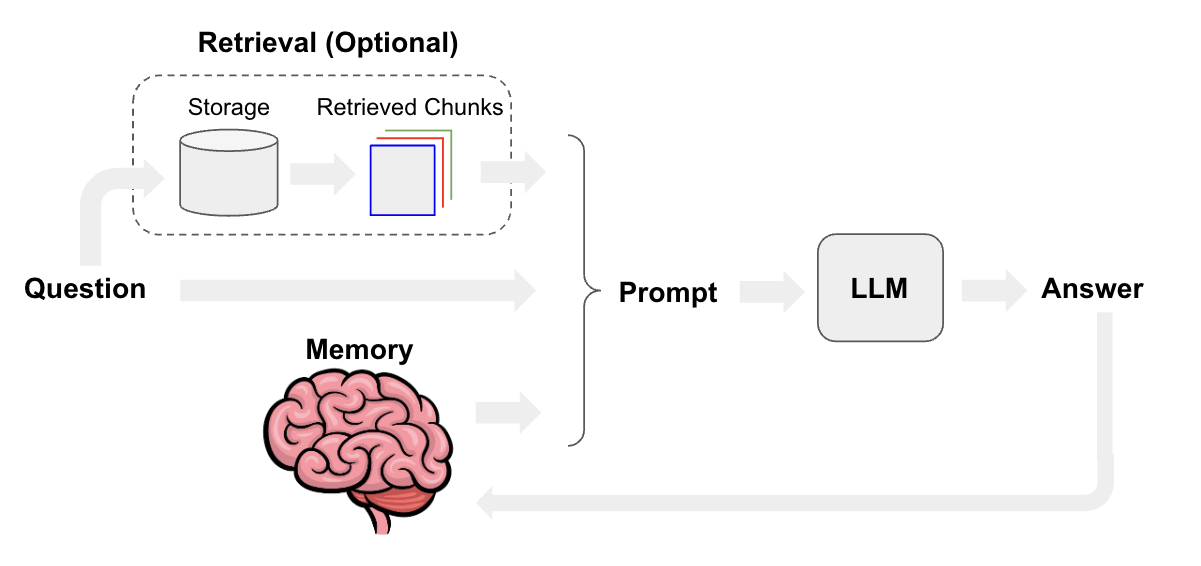

In [ ]:
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory


llm = OpenAI(temperature=0)

template = """You are a nice chatbot having a conversation with a human.

Previous conversation:
{chat_history}

New human question: {question}
Response:"""
prompt = PromptTemplate.from_template(template)

memory = ConversationBufferMemory(memory_key="chat_history")

conversation = LLMChain(
    llm=llm,
    prompt=prompt,
    verbose=True,
    memory=memory
)

In [ ]:
human_message = "What is the weather like today?"

response = conversation.predict(question = human_message)

print("Chatbot Response:" +  response)

<blockquote style="font-family: Arial, sans-serif; font-size: 16px; margin: 20px; padding: 15px; background-color: #f9f9f9; border-left: 10px solid #ccc; color:black; ">
<strong style="color: #0056b3;">Retrieval</strong>
- Document loader: This component helps in loading the external resource in memory

- Document Transformer: This is majorly a preprocessing steps once the external document is loaded in the memory (like tokenizing the text, character splitting, etc)

- Embedding model: To store these documents, we 1st need to generate embeddings for the text present.

- Vector Databases/Store: Databases specialized in storing vector data.

- Retrievers: Retrieve relevant entries from the vector DB once a prompt is run using LLM

<blockquote style="font-family: Arial, sans-serif; font-size: 16px; margin: 20px; padding: 15px; background-color: #f9f9f9; border-left: 10px solid #ccc; color:black; ">
<strong style="color: #0056b3;">Agents</strong>

- Google search

- Maths-Calculator

- A retriever for some external document

In [ ]:

from langchain.agents import Tool
from langchain.agents import AgentType
from langchain.memory import ConversationBufferMemory
from langchain.llms import OpenAI
from langchain.utilities import SerpAPIWrapper
from langchain.agents import initialize_agent

#You need to get serp_api and openai_api for this.
search = SerpAPIWrapper(serpapi_api_key=serp_api)
llm=OpenAI(openai_api_key=api_key)

tools = [
    Tool(
        name = "Current Search",
        func=search.run,
        description="useful for when you need to answer questions about current events or the current state of the world"

    ),]

agent_chain = initialize_agent(tools, llm, agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION)
agent_chain.run("Explain what happend in G20 meeting, 2023 that happened in Delhi?")